### Raffi Argianda
### 221351112
### Malam B

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

import plotly.express as px

In [107]:
df = pd.read_csv('4.starbucks.csv')
df.head()

,Menu,Calories,Fat,Carb,Fiber,Protein
0,Chonga Bagel,300,5.0,50,3,12
1,8-Grain Roll,380,6.0,70,7,10
2,Almond Croissant,410,22.0,45,3,10
3,Apple Fritter,460,23.0,56,2,7
4,Banana Nut Bread,420,22.0,52,2,6


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Menu      49 non-null     object 
 1   Calories  49 non-null     int64  
 2   Fat       49 non-null     float64
 3   Carb      49 non-null     int64  
 4   Fiber     49 non-null     int64  
 5   Protein   49 non-null     int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 2.4+ KB


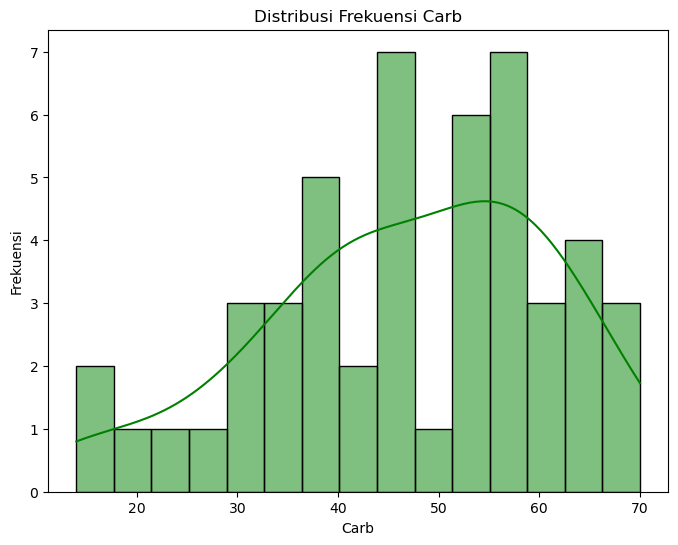

In [109]:
plt.figure(figsize=(8,6))
sns.histplot(df['Carb'],
             kde = True,
             color = 'green',
             bins = 15)
plt.title('Distribusi Frekuensi Carb')
plt.xlabel('Carb')
plt.ylabel('Frekuensi')
plt.show()

In [110]:
protein_counts = df['Protein'].value_counts()
protein_counts

Protein
6     10
5      8
2      8
3      5
7      4
8      3
12     2
10     2
4      2
9      2
11     1
1      1
17     1
Name: count, dtype: int64

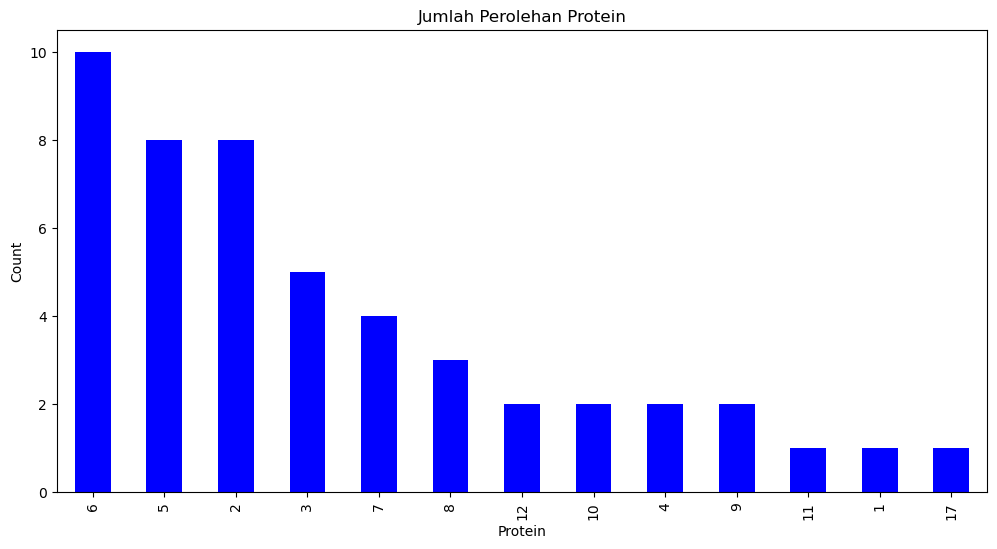

In [111]:
# Visualisasi jumlah transaksi per bulan
plt.figure(figsize=(12,6))
protein_counts.plot(kind = 'bar', title = 'protein_counts', color = 'blue')
plt.title('Jumlah Perolehan Protein')
plt.xlabel('Protein')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

In [112]:
df_drop = df.copy()
df_drop = df[['Menu', 'Carb', 'Fiber', 'Protein']]
df_drop.head(10)

,Menu,Carb,Fiber,Protein
0,Chonga Bagel,50,3,12
1,8-Grain Roll,70,7,10
2,Almond Croissant,45,3,10
3,Apple Fritter,56,2,7
4,Banana Nut Bread,52,2,6
5,Blueberry Muffin with Yogurt and Honey,53,1,6
6,Blueberry Scone,61,2,5
7,Butter Croissant,28,1,5
8,Butterfly Cookie,38,0,2
9,Cheese Danish,36,1,8


In [113]:
features = ['Carb', 'Protein', 'Fiber']
x = df_drop[features]

In [114]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [115]:
linked = linkage(x_scaled, method='ward')

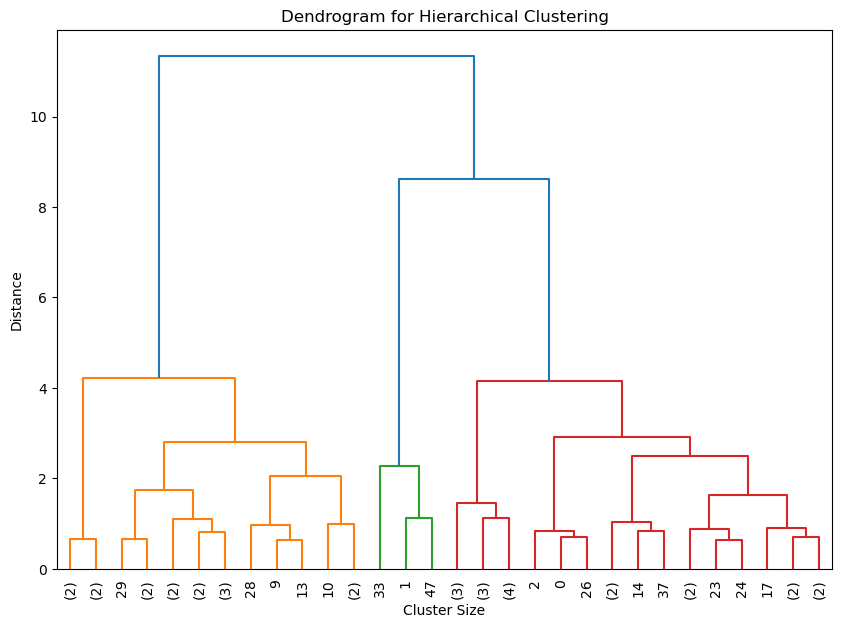

In [116]:
plt.figure(figsize=(10,7))
plt.title('Dendrogram for Hierarchical Clustering')
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=90, leaf_font_size=10)
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

In [117]:
cluster_labels = cut_tree(linked, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 3, 0, 3, 2, 2, 2, 0, 2, 1, 0, 2, 0, 0, 2, 3, 0, 0, 0, 2,
       0, 2, 2, 1, 3], dtype=int64)

In [118]:
df_drop['HC'] = cluster_labels
df_drop.head(10)

C:\Users\rapsa\AppData\Local\Temp\ipykernel_12460\2852622003.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drop['HC'] = cluster_labels


,Menu,Carb,Fiber,Protein,HC
0,Chonga Bagel,50,3,12,0
1,8-Grain Roll,70,7,10,1
2,Almond Croissant,45,3,10,0
3,Apple Fritter,56,2,7,0
4,Banana Nut Bread,52,2,6,0
5,Blueberry Muffin with Yogurt and Honey,53,1,6,0
6,Blueberry Scone,61,2,5,0
7,Butter Croissant,28,1,5,2
8,Butterfly Cookie,38,0,2,2
9,Cheese Danish,36,1,8,2


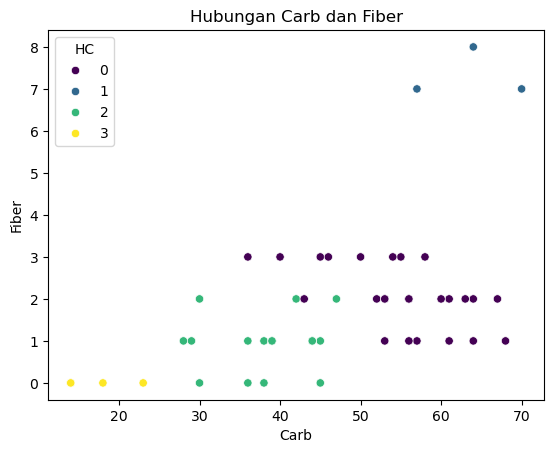

In [119]:
plt.figure()
sns.scatterplot(data = df_drop,
                x = 'Carb',
                y = 'Fiber',
                hue = 'HC',
                palette='viridis')
plt.title('Hubungan Carb dan Fiber')
plt.xlabel('Carb')
plt.ylabel('Fiber')
plt.show()

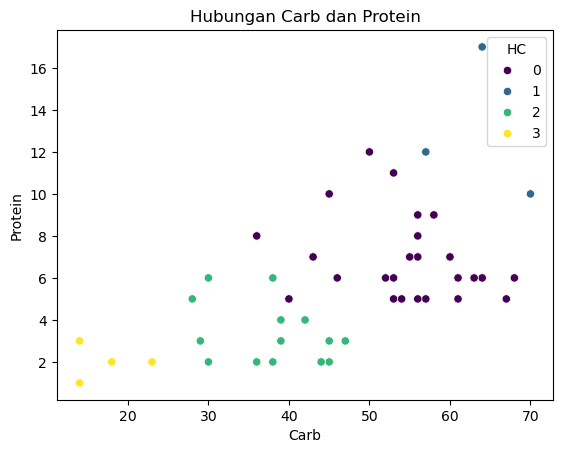

In [120]:
plt.figure()
sns.scatterplot(data = df_drop,
                x = 'Carb',
                y = 'Protein',
                hue = 'HC',
                palette='viridis')
plt.title('Hubungan Carb dan Protein')
plt.xlabel('Carb')
plt.ylabel('Protein')
plt.show()

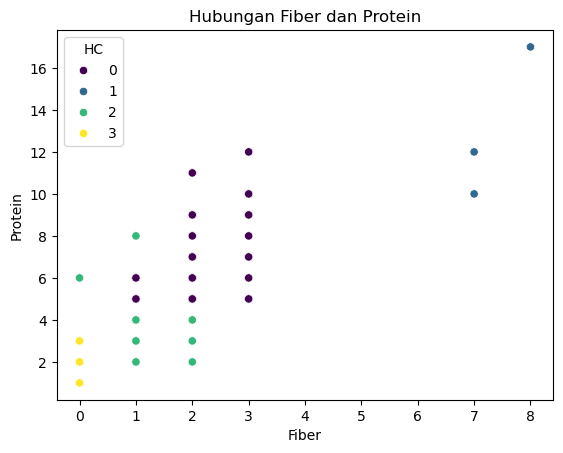

In [121]:
plt.figure()
sns.scatterplot(data = df_drop,
                x = 'Fiber',
                y = 'Protein',
                hue = 'HC',
                palette='viridis')
plt.title('Hubungan Fiber dan Protein')
plt.xlabel('Fiber')
plt.ylabel('Protein')
plt.show()

In [122]:
fig = px.scatter_3d(df_drop, x = 'Carb', y = 'Fiber', z = 'Protein', color = 'HC')
fig.show()